# Energy Project
This project is part of the data analyst study by DataScientest.
It is presented by Aras Ergunes and Andreas Moeller.
## Available Data
The primary data source is from (website)
It can be downloaded by this (link)
The data source describes the consumtion of energy and the production of emission free energy in france. It is aggregated on a daily base for different types of energy sources and for the french regions.
There are further data sources to be merged with our primary data source:
*
*
## Provided Data 
The primary data consists of several columns. They were analyzed and qualified in a spreadsheet (link).

## Import Data and necessary libraries

In [12]:
import numpy as np
import pandas as pd
df = pd.read_csv('eco2mix-regional-cons-def.csv', sep = ';')

## Data analysis
* Display the data type information of the variables
* Show number of null entries for the variables
* View the statistical values for the variables


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980288 entries, 0 to 1980287
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Code INSEE région    int64  
 1   Région               object 
 2   Nature               object 
 3   Date                 object 
 4   Heure                object 
 5   Date - Heure         object 
 6   Consommation (MW)    float64
 7   Thermique (MW)       float64
 8   Nucléaire (MW)       float64
 9   Eolien (MW)          float64
 10  Solaire (MW)         float64
 11  Hydraulique (MW)     float64
 12  Pompage (MW)         float64
 13  Bioénergies (MW)     float64
 14  Ech. physiques (MW)  float64
 15  Stockage batterie    float64
 16  Déstockage batterie  float64
 17  Eolien terrestre     float64
 18  Eolien offshore      float64
 19  TCO Thermique (%)    float64
 20  TCH Thermique (%)    float64
 21  TCO Nucléaire (%)    float64
 22  TCH Nucléaire (%)    float64
 23  TCO Eolien (%)       float64
 24

In [14]:
df.isna().sum()

Code INSEE région            0
Région                       0
Nature                       0
Date                         0
Heure                        0
Date - Heure                 0
Consommation (MW)           12
Thermique (MW)              12
Nucléaire (MW)          825127
Eolien (MW)                108
Solaire (MW)                12
Hydraulique (MW)            12
Pompage (MW)            860167
Bioénergies (MW)            12
Ech. physiques (MW)     136908
Stockage batterie      1700928
Déstockage batterie    1736064
Eolien terrestre       1736064
Eolien offshore        1837824
TCO Thermique (%)      1472256
TCH Thermique (%)      1472256
TCO Nucléaire (%)      1582176
TCH Nucléaire (%)      1582176
TCO Eolien (%)         1472256
TCH Eolien (%)         1472256
TCO Solaire (%)        1472256
TCH Solaire (%)        1472256
TCO Hydraulique (%)    1716480
TCH Hydraulique (%)    1716480
TCO Bioénergies (%)    1716480
TCH Bioénergies (%)    1716480
Column 30              1980288
dtype: i

In [15]:
df.describe()

,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
count,1.980288e+06,1.980276e+06,1.980276e+06,1.155161e+06,1.980180e+06,1.980276e+06,1.980276e+06,1.120121e+06,1.980276e+06,1.843380e+06,...,398112.000000,508032.000000,508032.000000,508032.000000,508032.000000,263808.000000,263808.000000,263808.000000,263808.000000,0.0
mean,4.991667e+01,4.497690e+03,3.783493e+02,6.232625e+03,2.564869e+02,9.196955e+01,6.001617e+02,-1.161740e+02,8.332810e+01,-4.633691e+02,...,31.110610,9.922807,27.050076,2.799379,33.714231,11.723816,27.980819,2.343480,53.879981,NaN
std,2.564001e+01,2.170361e+03,5.407519e+02,3.043245e+03,4.333763e+02,2.247761e+02,1.028933e+03,3.134738e+02,4.462511e+01,4.209660e+03,...,30.566573,13.727964,20.906299,5.318540,26.536978,17.097511,27.480661,0.874629,12.776024,NaN
min,1.100000e+01,7.200000e+02,-8.300000e+01,-1.440000e+02,-6.000000e+00,-2.300000e+01,-6.000000e+00,-2.581000e+03,4.000000e+00,-1.221900e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.630000,13.990000,NaN
25%,2.775000e+01,2.789000e+03,2.400000e+01,3.598000e+03,2.700000e+01,0.000000e+00,5.000000e+00,-1.600000e+01,4.800000e+01,-3.802000e+03,...,0.000000,0.360000,9.140000,0.030000,0.170000,0.120000,12.180000,1.740000,45.450000,NaN
50%,4.800000e+01,4.111000e+03,1.560000e+02,6.214000e+03,1.050000e+02,1.000000e+00,5.700000e+01,0.000000e+00,7.400000e+01,8.800000e+01,...,27.040000,3.980000,23.320000,1.680000,39.940000,1.980000,25.100000,2.150000,53.690000,NaN
75%,7.525000e+01,5.741000e+03,4.910000e+02,8.722000e+03,2.990000e+02,6.700000e+01,8.790000e+02,0.000000e+00,1.160000e+02,2.141000e+03,...,54.880000,14.460000,41.870000,2.630000,57.500000,18.370000,42.100000,2.740000,63.980000,NaN
max,9.300000e+01,1.533800e+04,4.293000e+03,1.363200e+04,4.900000e+03,2.894000e+03,8.742000e+03,0.000000e+00,5.480000e+02,1.395900e+04,...,102.010000,103.560000,117.980000,80.180000,112.430000,115.960000,2550.000000,9.690000,243.560000,NaN


## More Key Values
* Calculate variable categorisation
* Completeness of the variable values in percent
* Distribution of categorical variables

In [16]:
def get_values(columns):
    for column in columns:
        # Percentage of missing values
        percentage = (df[column].isna().sum() * 100) / len(df)
        # Categorical / Quantitative 
        no_categories = len(df[column].unique())
        if no_categories <= 12:
            cat_class = 'Categorical - up to 12 categories'
        else:
            cat_class = 'Quantitative'
            
        print('--Variable: ', column,'--')
    
        print(cat_class)
        print('Percentage of missing values ', round(percentage, 2).astype(str), '%')        

        if no_categories <= 12:
            print('Distribution: ', df[column].unique())
        print('')
# Wrong values provided

get_values(df.columns)

--Variable:  Code INSEE région --
Categorical - up to 12 categories
Percentage of missing values  0.0 %
Distribution:  [27 28 75 32 53 11 84 44 52 93 76 24]

--Variable:  Région --
Categorical - up to 12 categories
Percentage of missing values  0.0 %
Distribution:  ['Bourgogne-Franche-Comté' 'Normandie' 'Nouvelle-Aquitaine'
 'Hauts-de-France' 'Bretagne' 'Île-de-France' 'Auvergne-Rhône-Alpes'
 'Grand Est' 'Pays de la Loire' "Provence-Alpes-Côte d'Azur" 'Occitanie'
 'Centre-Val de Loire']

--Variable:  Nature --
Categorical - up to 12 categories
Percentage of missing values  0.0 %
Distribution:  ['Données définitives' 'Données consolidées']

--Variable:  Date --
Quantitative
Percentage of missing values  0.0 %

--Variable:  Heure --
Quantitative
Percentage of missing values  0.0 %

--Variable:  Date - Heure --
Quantitative
Percentage of missing values  0.0 %

--Variable:  Consommation (MW) --
Quantitative
Percentage of missing values  0.0 %

--Variable:  Thermique (MW) --
Quantitative
Pe

## Cut the time frame
Our source has a daily growing data base. Its's obvious that we can't always take the newest data for our investigation. To have a clear and concise database we decided to cut a dataframe with the period of one year out of the whole data frame. To avoid difficult one time effects and to have data from the near past we decidet to investigate the time between July 2021 and June 2022. With our choice we tried to avoid side effects from the corona crisis and the ukraine war as well.
* Convert "Date - Heure" column to datetime
* Copy data from July 2021 to June 2022 into a df_project dataframe

In [17]:
df["Date - Heure"] = pd.to_datetime(df["Date - Heure"])

start_date = pd.to_datetime("2021-07-01 00:00:00+02:00")
end_date = pd.to_datetime("2022-06-30 00:00:00+02:00")

df_project = df[(df['Date - Heure'] >= start_date) & (df['Date - Heure'] <= end_date)]

# New Data Analysis for the project data frame
* Statistical values
* Remaining null values
* Additional analysis

In [18]:
df_project.describe()

,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
count,192960.000000,192960.000000,192960.000000,112560.000000,192960.000000,192960.000000,192960.000000,112560.000000,192960.000000,99504.000000,...,170880.000000,192960.000000,192960.000000,192960.000000,192960.000000,52992.000000,52992.000000,52992.000000,52992.000000,0.0
mean,49.916667,4475.348653,417.727353,5557.861292,347.475161,147.849357,518.613200,-110.202168,95.837671,72.863262,...,18.642865,8.942269,24.570061,3.035931,44.813816,10.790058,30.002904,2.477274,54.587941,NaN
std,25.640069,2141.400748,566.971946,3063.417731,580.307487,329.592727,907.123025,305.355709,42.546796,1632.539377,...,23.196671,12.710593,18.428853,5.282393,23.168182,15.540868,19.440094,0.922605,11.136364,NaN
min,11.000000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2581.000000,21.000000,-10812.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.890000,16.720000,NaN
25%,27.750000,2783.000000,25.000000,2737.000000,41.000000,0.000000,5.000000,-19.000000,57.000000,49.000000,...,0.000000,0.180000,9.090000,1.420000,31.650000,0.130000,14.910000,1.810000,48.310000,NaN
50%,48.000000,4094.000000,178.000000,5131.000000,148.000000,1.000000,55.000000,0.000000,86.000000,65.000000,...,3.770000,3.260000,21.330000,1.980000,52.500000,2.080000,26.660000,2.240000,55.030000,NaN
75%,75.250000,5724.000000,535.000000,7817.000000,401.000000,118.000000,711.000000,0.000000,131.000000,82.000000,...,39.530000,13.200000,37.110000,2.780000,61.170000,16.510000,46.670000,2.960000,62.500000,NaN
max,93.000000,13737.000000,2796.000000,12754.000000,4900.000000,2894.000000,8251.000000,0.000000,248.000000,10823.000000,...,92.920000,103.310000,99.210000,80.180000,94.330000,90.620000,87.640000,7.500000,80.250000,NaN


In [19]:
df_project.isna().sum()

Code INSEE région           0
Région                      0
Nature                      0
Date                        0
Heure                       0
Date - Heure                0
Consommation (MW)           0
Thermique (MW)              0
Nucléaire (MW)          80400
Eolien (MW)                 0
Solaire (MW)                0
Hydraulique (MW)            0
Pompage (MW)            80400
Bioénergies (MW)            0
Ech. physiques (MW)     93456
Stockage batterie       17856
Déstockage batterie     52992
Eolien terrestre        52992
Eolien offshore        111312
TCO Thermique (%)           0
TCH Thermique (%)           0
TCO Nucléaire (%)       22080
TCH Nucléaire (%)       22080
TCO Eolien (%)              0
TCH Eolien (%)              0
TCO Solaire (%)             0
TCH Solaire (%)             0
TCO Hydraulique (%)    139968
TCH Hydraulique (%)    139968
TCO Bioénergies (%)    139968
TCH Bioénergies (%)    139968
Column 30              192960
dtype: int64

In [20]:
def get_values(columns):
    for column in columns:
        # Percentage of missing values
        percentage = (df_project[column].isna().sum() * 100) / len(df_project)
        # Categorical / Quantitative 
        no_categories = len(df_project[column].unique())
        if no_categories <= 12:
            cat_class = 'Categorical - up to 12 categories'
        else:
            cat_class = 'Quantitative'
            
        print('--Variable: ', column,'--')
    
        print(cat_class)
        print('Percentage of missing values ', round(percentage, 2).astype(str), '%')        

        if no_categories <= 12:
            print('Distribution: ', df_project[column].unique())
        print('')
# Wrong values provided

get_values(df_project.columns)

--Variable:  Code INSEE région --
Categorical - up to 12 categories
Percentage of missing values  0.0 %
Distribution:  [11 53 27 93 28 44 84 52 76 32 24 75]

--Variable:  Région --
Categorical - up to 12 categories
Percentage of missing values  0.0 %
Distribution:  ['Île-de-France' 'Bretagne' 'Bourgogne-Franche-Comté'
 "Provence-Alpes-Côte d'Azur" 'Normandie' 'Grand Est'
 'Auvergne-Rhône-Alpes' 'Pays de la Loire' 'Occitanie' 'Hauts-de-France'
 'Centre-Val de Loire' 'Nouvelle-Aquitaine']

--Variable:  Nature --
Categorical - up to 12 categories
Percentage of missing values  0.0 %
Distribution:  ['Données consolidées']

--Variable:  Date --
Quantitative
Percentage of missing values  0.0 %

--Variable:  Heure --
Quantitative
Percentage of missing values  0.0 %

--Variable:  Date - Heure --
Quantitative
Percentage of missing values  0.0 %

--Variable:  Consommation (MW) --
Quantitative
Percentage of missing values  0.0 %

--Variable:  Thermique (MW) --
Quantitative
Percentage of missing va

## Examine the null values at Nucléaire (MW)
The nuclear sector might be important to our investigation but we have a lot of null values in this sector. We suspect that some regions simply do not have nuclear power plants. To support this thesis, we first filter out all regions with null values from the nuclear sector. We then check whether even a single value for nuclear energy exists in these regions. If there are none, we regard our thesis as confirmed.

In [21]:
# regions_nuc - regions where we have null values for nuclear energy
regions_nuc = df_project.loc[df['Nucléaire (MW)'].isna()]['Région'].unique()
# proof if there are any valid values for nuclear energy in these regions
df_project.loc[(df_project.apply(lambda x: x['Région'] in [regions_nuc.any()], axis=1)) & (df['Nucléaire (MW)'].notnull())]

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30


## Examine the null values at Pompage (MW)
The same applies to the pump sector as to the nuclear sector. Here, too, an identical proof is provided.

In [22]:
# regions_pmp - regions where we have null values for pumping energy
regions_pmp = df_project.loc[df['Pompage (MW)'].isna()]['Région'].unique()
# proof if there are any valid values for pumping energy in these regions
df_project.loc[(df_project.apply(lambda x: x['Région'] in [regions_pmp.any()], axis=1)) & (df['Pompage (MW)'].notnull())]

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30


## Examine the null values at Ech. physiques (MW)
In contrast to the values for nuclear and pumped power plants, we can assume that there should be values for energy exchange with other regions in principle for all regions. Nevertheless, we have a relevant proportion of missing values in a number of regions.

In [23]:
# regions_eph - regions where we have null values for eph energy
regions_eph = df_project.loc[df_project['Ech. physiques (MW)'].isna()]['Région'].unique()
df_project.loc[df_project['Ech. physiques (MW)'].isna()]['Région'].unique()

array(['Île-de-France', 'Bretagne', 'Bourgogne-Franche-Comté',
       "Provence-Alpes-Côte d'Azur", 'Pays de la Loire', 'Grand Est',
       'Hauts-de-France', 'Auvergne-Rhône-Alpes', 'Nouvelle-Aquitaine',
       'Occitanie', 'Centre-Val de Loire', 'Normandie'], dtype=object)

## Searching for regional gaps in the data
We still achieve null values in three important columns:
* Nucléaire (MW)
* Pompage (MW)
* Ech. physiques (MW)

For further data processing, the values for nuclear and pumping power plants are replaced with 0. For the missing values in energy exchange we use the mean value.

In [24]:
exchange_mean = df_project.loc[(df_project.apply(lambda x: x['Région'] in [regions_eph.any()], axis=1)) & (df_project['Ech. physiques (MW)'].notnull()), 'Ech. physiques (MW)'].mean()
exchange_mean

7832.685483870968

In [25]:
df_project.loc[df_project['Région'].isin(regions_nuc), 'Nucléaire (MW)'] = df_project.loc[df_project['Région'].isin(regions_nuc), 'Nucléaire (MW)'].fillna(0)
df_project.loc[df_project['Région'].isin(regions_pmp), 'Pompage (MW)'] = df_project.loc[df_project['Région'].isin(regions_pmp), 'Pompage (MW)'].fillna(0)
brit_mean = df_project.loc[(df_project['Région'] == 'Bretagne') & (df_project['Ech. physiques (MW)'].notnull()), 'Ech. physiques (MW)'].mean()
df_project.loc[df_project['Région'].isin(regions_eph), 'Ech. physiques (MW)'] = df_project.loc[df_project['Région'].isin(regions_eph), 'Ech. physiques (MW)'].fillna(exchange_mean)

C:\Users\Philosophie\AppData\Local\Temp\ipykernel_10044\3929850748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project.loc[df_project['Région'].isin(regions_eph), 'Ech. physiques (MW)'] = df_project.loc[df_project['Région'].isin(regions_eph), 'Ech. physiques (MW)'].fillna(exchange_mean)


## Add additional variables
* Total production
* Total green production

In [26]:
df_project.loc[:, 'Total Production'] = df_project['Thermique (MW)'] + df_project['Nucléaire (MW)'] + df_project['Eolien (MW)'] + df_project['Solaire (MW)'] + df_project['Hydraulique (MW)'] + df_project['Pompage (MW)'] + df_project['Bioénergies (MW)'] + df_project['Ech. physiques (MW)']

df_project.loc[:, 'Green Production'] = df_project.loc[:, 'Total Production'] - df_project.loc[:, 'Nucléaire (MW)']

C:\Users\Philosophie\AppData\Local\Temp\ipykernel_10044\3406343020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project.loc[:, 'Total Production'] = df_project['Thermique (MW)'] + df_project['Nucléaire (MW)'] + df_project['Eolien (MW)'] + df_project['Solaire (MW)'] + df_project['Hydraulique (MW)'] + df_project['Pompage (MW)'] + df_project['Bioénergies (MW)'] + df_project['Ech. physiques (MW)']
C:\Users\Philosophie\AppData\Local\Temp\ipykernel_10044\3406343020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

## Again check for null values

In [27]:
df_project.isna().sum()

Code INSEE région           0
Région                      0
Nature                      0
Date                        0
Heure                       0
Date - Heure                0
Consommation (MW)           0
Thermique (MW)              0
Nucléaire (MW)              0
Eolien (MW)                 0
Solaire (MW)                0
Hydraulique (MW)            0
Pompage (MW)                0
Bioénergies (MW)            0
Ech. physiques (MW)         0
Stockage batterie       17856
Déstockage batterie     52992
Eolien terrestre        52992
Eolien offshore        111312
TCO Thermique (%)           0
TCH Thermique (%)           0
TCO Nucléaire (%)       22080
TCH Nucléaire (%)       22080
TCO Eolien (%)              0
TCH Eolien (%)              0
TCO Solaire (%)             0
TCH Solaire (%)             0
TCO Hydraulique (%)    139968
TCH Hydraulique (%)    139968
TCO Bioénergies (%)    139968
TCH Bioénergies (%)    139968
Column 30              192960
Total Production            0
Green Prod

## Prepare for statistical analysis
Simpler names for the variables are a good choice for further investigation, especially for some statistical tests. For easyer understanding we choose to rename the columns to english, too.

In [28]:
# Replace the variable names with easy to handle english names
bib_rename = {'Code INSEE région'   : 'insee_regional_code',
              'Région'              : 'region',
              'Nature'              : 'nature',
              'Date'                : 'date',
              'Heure'               : 'time',
              'Date - Heure'        : 'datetime',
              'Consommation (MW)'   : 'consumtion_mw',
              'Thermique (MW)'      : 'thermal_mw',
              'Nucléaire (MW)'      : 'nuclear_mw',
              'Eolien (MW)'         : 'wind_mw',
              'Solaire (MW)'        : 'solar_mw',
              'Hydraulique (MW)'    : 'hydraulic_mw',
              'Pompage (MW)'        : 'pumping_mw',
              'Bioénergies (MW)'    : 'biological_mw',
              'Ech. physiques (MW)' : 'energy_exchange_mw',
              'Stockage batterie'   : 'battery_storage',
              'Déstockage batterie' : 'battery_clearance',
              'Eolien terrestre'    : 'onshore_wind',
              'Eolien offshore'     : 'offshore_wind',
              'TCO Thermique (%)'   : 'thermal_coverage',
              'TCH Thermique (%)'   : 'thermal_utilization',
              'TCO Nucléaire (%)'   : 'nuclear_coverage',
              'TCH Nucléaire (%)'   : 'nuclear_utilization',
              'TCO Eolien (%)'      : 'wind_coverage',
              'TCH Eolien (%)'      : 'wind_utilization',
              'TCO Solaire (%)'     : 'solar_coverage',
              'TCH Solaire (%)'     : 'solar_utilization',
              'TCO Hydraulique (%)' : 'hydraulic_coverage',
              'TCH Hydraulique (%)' : 'hydraulic_utilization',
              'TCO Bioénergies (%)' : 'biological_coverage',
              'TCH Bioénergies (%)' : 'biological_utilization',
              'Column 30'           : 'column_30',
              'Total Production'    : 'total_production',
              'Green Production'    : 'green_production'}

df_project = df_project.rename(bib_rename, axis = 1)
df_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192960 entries, 1787328 to 1980287
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   insee_regional_code     192960 non-null  int64  
 1   region                  192960 non-null  object 
 2   nature                  192960 non-null  object 
 3   date                    192960 non-null  object 
 4   time                    192960 non-null  object 
 5   datetime                192960 non-null  object 
 6   consumtion_mw           192960 non-null  float64
 7   thermal_mw              192960 non-null  float64
 8   nuclear_mw              192960 non-null  float64
 9   wind_mw                 192960 non-null  float64
 10  solar_mw                192960 non-null  float64
 11  hydraulic_mw            192960 non-null  float64
 12  pumping_mw              192960 non-null  float64
 13  biological_mw           192960 non-null  float64
 14  energy_exchan

In [29]:
# Pearson test (numerical variables on both sides)

from scipy.stats import pearsonr

# Numerical variables
var_num = ['thermal_mw',
           'nuclear_mw',
           'wind_mw',
           'solar_mw',
           'hydraulic_mw',
           'pumping_mw',
           'biological_mw',
           'energy_exchange_mw',
           #'battery_storage',
           #'battery_clearance',
           #'onshore_wind',
           #'offshore_wind',
           'thermal_coverage',
           'thermal_utilization',
           #'nuclear_coverage',
           #'nuclear_utilization',
           'wind_coverage',
           'wind_utilization',
           'solar_coverage',
           'solar_utilization',
           #'hydraulic_coverage',
           #'hydraulic_utilization',
           #'biological_coverage',
           #'biological_utilization',
           'total_production',
           'green_production']

for var in var_num:
    print('--', var, '------------------------')
    print('H0: The production of', var, 'is correlated to the consumption')
    print('H1: The production of', var, 'is not correlated to the consumption')
    
    result = pearsonr(x = df_project['consumtion_mw'], y = df_project[var]) 

    print("p-value: ", result[1])
    print("coefficient: ", result[0])
    print('')


-- thermal_mw ------------------------
H0: The production of thermal_mw is correlated to the consumption
H1: The production of thermal_mw is not correlated to the consumption
p-value:  0.0
coefficient:  0.3289159363060605

-- nuclear_mw ------------------------
H0: The production of nuclear_mw is correlated to the consumption
H1: The production of nuclear_mw is not correlated to the consumption
p-value:  0.0
coefficient:  0.18800918799577745

-- wind_mw ------------------------
H0: The production of wind_mw is correlated to the consumption
H1: The production of wind_mw is not correlated to the consumption
p-value:  0.0
coefficient:  0.0879071502188516

-- solar_mw ------------------------
H0: The production of solar_mw is correlated to the consumption
H1: The production of solar_mw is not correlated to the consumption
p-value:  9.128200118662357e-131
coefficient:  0.05534812166439506

-- hydraulic_mw ------------------------
H0: The production of hydraulic_mw is correlated to the consu

In [30]:
# ANOVA test (categorical to numeral variables)
import statsmodels.api

var_cat = ['insee_regional_code',
           'region',
           'nature',
           'time']

print('-- region ------------------------')
print('H0: The region is correlated to the consumption')
print('H1: The region is not correlated to the consumption')

result = statsmodels.formula.api.ols('consumtion_mw ~ region', data = df_project).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)
print('')

print('-- nature ------------------------')
print('H0: The nature is correlated to the consumption')
print('H1: The nature is not correlated to the consumption')

result = statsmodels.formula.api.ols('consumtion_mw ~ nature', data = df_project).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)
print('')

print('-- time ------------------------')
print('H0: The time is correlated to the consumption')
print('H1: The time is not correlated to the consumption')

result = statsmodels.formula.api.ols('consumtion_mw ~ time', data = df_project).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)
print('')


-- region ------------------------
H0: The region is correlated to the consumption
H1: The region is not correlated to the consumption


,df,sum_sq,mean_sq,F,PR(>F)
region,11.0,6.425050e+11,5.840954e+10,46507.374072,0.0
Residual,192948.0,2.423273e+11,1.255920e+06,NaN,NaN



-- nature ------------------------
H0: The nature is correlated to the consumption
H1: The nature is not correlated to the consumption


,df,sum_sq,mean_sq,F,PR(>F)
nature,0.0,0.000000e+00,NaN,NaN,NaN
Residual,192959.0,8.848322e+11,4.585597e+06,NaN,NaN



-- time ------------------------
H0: The time is correlated to the consumption
H1: The time is not correlated to the consumption


,df,sum_sq,mean_sq,F,PR(>F)
time,47.0,2.261423e+10,4.811539e+08,107.652996,0.0
Residual,192912.0,8.622180e+11,4.469489e+06,NaN,NaN


## Variables with many null values
There are still a number of variables with a significant number of missing values that prevent the execution of statistical tests

* battery_storage            17856
* battery_clearance          52992
* onshore_wind               52992
* offshore_wind             111312
* nuclear_coverage           22080
* nuclear_utilization        22080
* hydraulic_coverage        139968
* hydraulic_utilization     139968
* biological_coverage       139968
* biological_utilization    139968

The null values will be replaced by the mean of the variable

In [31]:
mean = df_project.mean()
df_project.fillna(mean, inplace=True)
df_project.isna().sum()

C:\Users\Philosophie\AppData\Local\Temp\ipykernel_10044\3774508028.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df_project.mean()


insee_regional_code            0
region                         0
nature                         0
date                           0
time                           0
datetime                       0
consumtion_mw                  0
thermal_mw                     0
nuclear_mw                     0
wind_mw                        0
solar_mw                       0
hydraulic_mw                   0
pumping_mw                     0
biological_mw                  0
energy_exchange_mw             0
battery_storage                0
battery_clearance              0
onshore_wind                   0
offshore_wind                  0
thermal_coverage               0
thermal_utilization            0
nuclear_coverage               0
nuclear_utilization            0
wind_coverage                  0
wind_utilization               0
solar_coverage                 0
solar_utilization              0
hydraulic_coverage             0
hydraulic_utilization          0
biological_coverage            0
biological

# Finding the right granularity
To go on with investigation the data should be transformed on a daily base. A monthly base would be an alternative choice. With a daily base we will have more records and expect to get better results.

In [32]:
df_daily = df_project.drop(['time', 'datetime'], axis = 1)
df_daily = df_daily.groupby(['insee_regional_code', 'region', 'nature', 'date']).sum()
df_daily.head(20)

consumtion_mw  \
insee_regional_code region        nature              date                        
11                  Île-de-France Données consolidées 2021-07-01       304715.0   
                                                      2021-07-02       304262.0   
                                                      2021-07-03       274596.0   
                                                      2021-07-04       263857.0   
                                                      2021-07-05       301591.0   
                                                      2021-07-06       294350.0   
                                                      2021-07-07       299089.0   
                                                      2021-07-08       299274.0   
                                                      2021-07-09       295934.0   
                                                      2021-07-10       269803.0   
                                                      2021-07-11       256591.0   
                                                      2021-07-12       294888.0   
                                                      2021-07-13       298736.0   
                                                      2021-07-14       269922.0   
                                                      2021-07-15       288218.0   
                                                      2021-07-16       284422.0   
                                                      2021-07-17       261635.0   
                                                      2021-07-18       256235.0   
                                                      2021-07-19       302410.0   
                                                      2021-07-20       305221.0   

                                                                  thermal_mw  \
insee_regional_code region        nature              date                     
11                  Île-de-France Données consolidées 2021-07-01       937.0   
                                                      2021-07-02       454.0   
                                                      2021-07-03         0.0   
                                                      2021-07-04         0.0   
                                                      2021-07-05         0.0   
                                                      2021-07-06         0.0   
                                                      2021-07-07         0.0   
                                                      2021-07-08         0.0   
                                                      2021-07-09         6.0   
                                                      2021-07-10        11.0   
                                                      2021-07-11         0.0   
                                                      2021-07-12         0.0   
                                                      2021-07-13         1.0   
                                                      2021-07-14         0.0   
                                                      2021-07-15         0.0   
                                                      2021-07-16         0.0   
                                                      2021-07-17         0.0   
                                                      2021-07-18         0.0   
                                                      2021-07-19         0.0   
                                                      2021-07-20         0.0   

                                                                  nuclear_mw  \
insee_regional_code region        nature              date                     
11                  Île-de-France Données consolidées 2021-07-01         0.0   
                                                      2021-07-02         0.0   
                                                      2021-07-03         0.0   
                                                      2021-07-04         0.0  

# Normalisation of numerical variables
For ml modelling we normalize the numerical variables

In [33]:
df_daily = (df_daily - df_daily.mean()) / df_daily.std()
df_daily.head(20)


consumtion_mw  \
insee_regional_code region        nature              date                        
11                  Île-de-France Données consolidées 2021-07-01       0.895603   
                                                      2021-07-02       0.891090   
                                                      2021-07-03       0.595545   
                                                      2021-07-04       0.488559   
                                                      2021-07-05       0.864481   
                                                      2021-07-06       0.792343   
                                                      2021-07-07       0.839555   
                                                      2021-07-08       0.841398   
                                                      2021-07-09       0.808123   
                                                      2021-07-10       0.547796   
                                                      2021-07-11       0.416172   
                                                      2021-07-12       0.797703   
                                                      2021-07-13       0.836038   
                                                      2021-07-14       0.548981   
                                                      2021-07-15       0.731253   
                                                      2021-07-16       0.693436   
                                                      2021-07-17       0.466423   
                                                      2021-07-18       0.412626   
                                                      2021-07-19       0.872640   
                                                      2021-07-20       0.900644   

                                                                  thermal_mw  \
insee_regional_code region        nature              date                     
11                  Île-de-France Données consolidées 2021-07-01   -0.730338   
                                                      2021-07-02   -0.748794   
                                                      2021-07-03   -0.766141   
                                                      2021-07-04   -0.766141   
                                                      2021-07-05   -0.766141   
                                                      2021-07-06   -0.766141   
                                                      2021-07-07   -0.766141   
                                                      2021-07-08   -0.766141   
                                                      2021-07-09   -0.765912   
                                                      2021-07-10   -0.765721   
                                                      2021-07-11   -0.766141   
                                                      2021-07-12   -0.766141   
                                                      2021-07-13   -0.766103   
                                                      2021-07-14   -0.766141   
                                                      2021-07-15   -0.766141   
                                                      2021-07-16   -0.766141   
                                                      2021-07-17   -0.766141   
                                                      2021-07-18   -0.766141   
                                                      2021-07-19   -0.766141   
                                                      2021-07-20   -0.766141   

                                                                  nuclear_mw  \
insee_regional_code region        nature              date                     
11                  Île-de-France Données consolidées 2021-07-01   -0.900758   
                                                      2021-07-02   -0.900758   
                                                      2021-07-03   -0.900758   
                                                      2021-07-04   -0.900758  

## Missing variables
Additional Variables woult be a good choice for further investigations:
* month

## Normalized variables
In some cases it would be better to compare the normalized consumption with other variables
* coverage variables
* utilisation variables

* graphical display
* decide what is our target variable (comnsumption)
* decide which variables are important
* add useful variables from other dataframes
  * meteorogical data (link)
  * geographical data
  * population data
  * industrial production
* ML techniques

In [34]:
# We will use  Histogram-based Gradient Boosting Regressor Model to predict the consumption of the df_daily dataframe.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# features and target variable
features = ['thermal_mw', 'nuclear_mw', 'wind_mw', 'solar_mw', 'hydraulic_mw', 'pumping_mw', 'biological_mw', 'energy_exchange_mw', 'wind_utilization', 'solar_coverage','solar_utilization','hydraulic_coverage','hydraulic_utilization', 'biological_coverage', 'biological_utilization', 'total_production', 'green_production']
target = 'consumtion_mw'

X = df_daily[features]
y = df_daily[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adjust the HistGradientBoostingRegressor model
model = HistGradientBoostingRegressor(
    max_iter=100,
    learning_rate=0.1,
    max_depth=3,
    max_leaf_nodes=31,
    min_samples_leaf=20,
    l2_regularization=0.0, 
    verbose=1,
    random_state=42
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


# Predict on the test data
y_pred = model.predict(X_test)






Binning 0.000 GB of training data: 0.014 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 8 leaves, max depth = 3, in 0.005s
[2/100] 1 tree, 8 leaves, max depth = 3, in 0.003s
[3/100] 1 tree, 8 leaves, max depth = 3, in 0.003s
[4/100] 1 tree, 8 leaves, max depth = 3, in 0.003s
[5/100] 1 tree, 8 leaves, max depth = 3, in 0.003s
[6/100] 1 tree, 8 leaves, max depth = 3, in 0.003s
[7/100] 1 tree, 8 leaves, max depth = 3, in 0.003s
[8/100] 1 tree, 8 leaves, max depth = 3, in 0.003s
[9/100] 1 tree, 8 leaves, max depth = 3, in 0.003s
[10/100] 1 tree, 8 leaves, max depth = 3, in 0.003s
[11/100] 1 tree, 8 leaves, max depth = 3, in 0.003s
[12/100] 1 tree, 8 leaves, max depth = 3, in 0.003s
[13/100] 1 tree, 8 leaves, max depth = 3, in 0.003s
[14/100] 1 tree, 8 leaves, max depth = 3, in 0.003s
[15/100] 1 tree, 8 leaves, max depth = 3, in 0.003s
[16/100] 1 tree, 8 leaves, max depth = 3, in 0.003s
[17/100] 1 tree, 8 leaves, max depth = 3, in 0.003s
[18/100] 1 tree, 8 leaves, max depth = 3, in 0.00

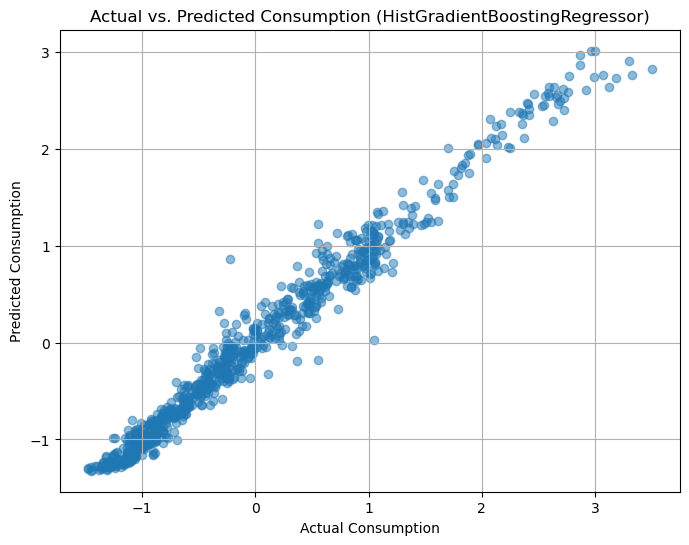

In [35]:
import matplotlib.pyplot as plt
# Create a scatterplot to visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Consumption")
plt.ylabel("Predicted Consumption")
plt.title("Actual vs. Predicted Consumption (HistGradientBoostingRegressor)")
plt.grid(True)
plt.show()



In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select features and target variable
features = ['thermal_mw', 'nuclear_mw', 'wind_mw', 'solar_mw', 'hydraulic_mw', 'pumping_mw', 'biological_mw', 'energy_exchange_mw', 'wind_utilization', 'solar_coverage','solar_utilization','hydraulic_coverage','hydraulic_utilization', 'biological_coverage', 'biological_utilization', 'total_production', 'green_production']
target = 'consumtion_mw' 

X = df_daily[features]
y = df_daily[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)




R^2 Score: 0.7238627084585425
Mean Squared Error: 0.2948698310122171


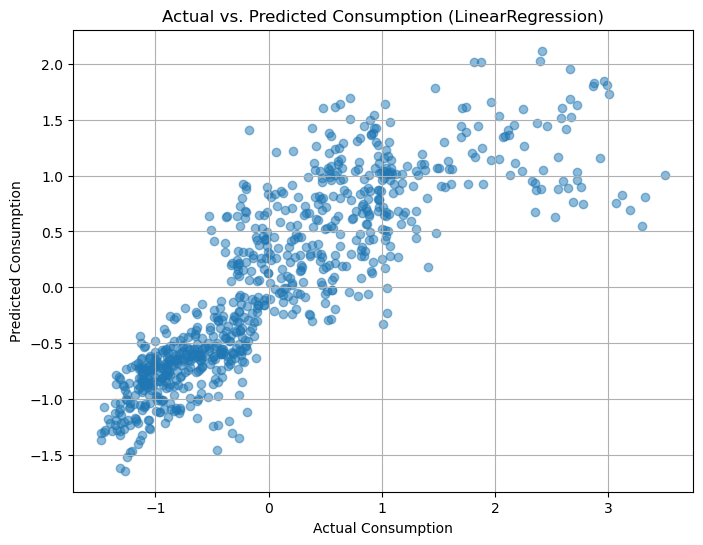

In [53]:
# Create a scatterplot to visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Consumption")
plt.ylabel("Predicted Consumption")
plt.title("Actual vs. Predicted Consumption (LinearRegression)")
plt.grid(True)
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# Select features and target variable
features = ['thermal_mw', 'nuclear_mw', 'wind_mw', 'solar_mw', 'hydraulic_mw', 'pumping_mw', 'biological_mw', 'energy_exchange_mw', 'wind_utilization', 'solar_coverage','solar_utilization','hydraulic_coverage','hydraulic_utilization', 'biological_coverage', 'biological_utilization', 'total_production', 'green_production']
target = 'consumtion_mw' 

X = df_daily[features]
y = df_daily[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)




R^2 Score: 0.9643492027460319
Mean Squared Error: 0.03806926801898515


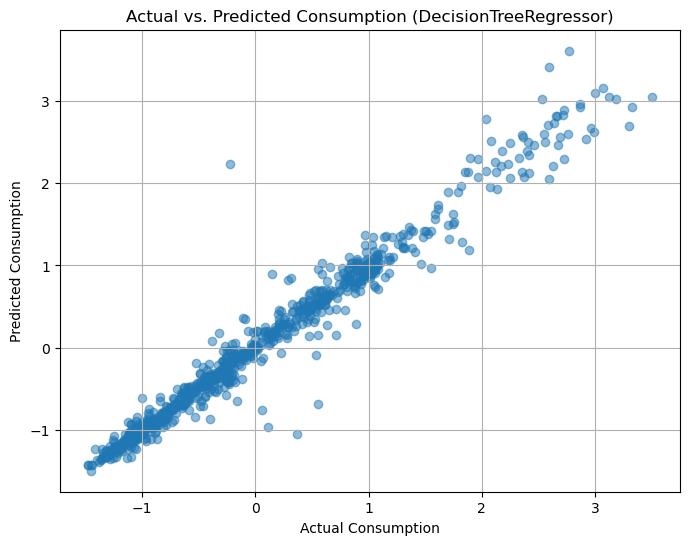

In [55]:

# Create a scatterplot to visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Consumption")
plt.ylabel("Predicted Consumption")
plt.title("Actual vs. Predicted Consumption (DecisionTreeRegressor)")
plt.grid(True)
plt.show()

In [56]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Select features and target variable
features = ['thermal_mw', 'nuclear_mw', 'wind_mw', 'solar_mw', 'hydraulic_mw', 'pumping_mw', 'biological_mw', 'energy_exchange_mw', 'wind_utilization', 'solar_coverage','solar_utilization','hydraulic_coverage','hydraulic_utilization', 'biological_coverage', 'biological_utilization', 'total_production', 'green_production']
target = 'consumtion_mw' 

X = df_daily[features]
y = df_daily[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


R^2 Score: 0.986863772267475
Mean Squared Error: 0.014027360194652009


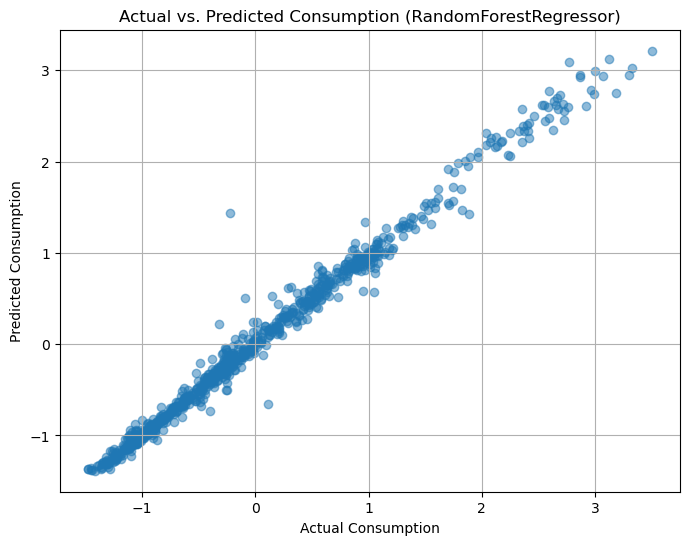

In [57]:

# Create a scatterplot to visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Consumption")
plt.ylabel("Predicted Consumption")
plt.title("Actual vs. Predicted Consumption (RandomForestRegressor)")
plt.grid(True)
plt.show()

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Select features and target variable
features = ['thermal_mw', 'nuclear_mw', 'wind_mw', 'solar_mw', 'hydraulic_mw', 'pumping_mw', 'biological_mw', 'energy_exchange_mw', 'wind_utilization', 'solar_coverage','solar_utilization','hydraulic_coverage','hydraulic_utilization', 'biological_coverage', 'biological_utilization', 'total_production', 'green_production']
target = 'consumtion_mw' 

X = df_daily[features]
y = df_daily[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVR model
model = SVR(kernel='linear')  # I have choosed 'linear' model. But there are also 'rbf' or 'poly' models.
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


R^2 Score: 0.6959074087536965
Mean Squared Error: 0.3247215560503265


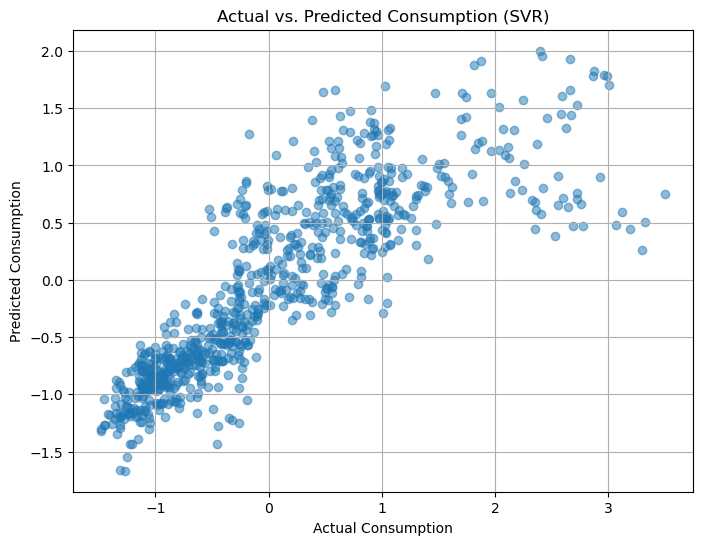

In [59]:

# Create a scatterplot to visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Consumption")
plt.ylabel("Predicted Consumption")
plt.title("Actual vs. Predicted Consumption (SVR)")
plt.grid(True)
plt.show()

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


# Select features and target variable
features = ['thermal_mw', 'nuclear_mw', 'wind_mw', 'solar_mw', 'hydraulic_mw', 'pumping_mw', 'biological_mw', 'energy_exchange_mw', 'wind_utilization', 'solar_coverage','solar_utilization','hydraulic_coverage','hydraulic_utilization', 'biological_coverage', 'biological_utilization', 'total_production', 'green_production']
target = 'consumtion_mw'  

X = df_daily[features]
y = df_daily[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNeighborsRegressor model
model = KNeighborsRegressor(n_neighbors=5)  # I have choosed 5 neighbors. But I can choose any number.
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


R^2 Score: 0.9622474042882265
Mean Squared Error: 0.040313647807803964


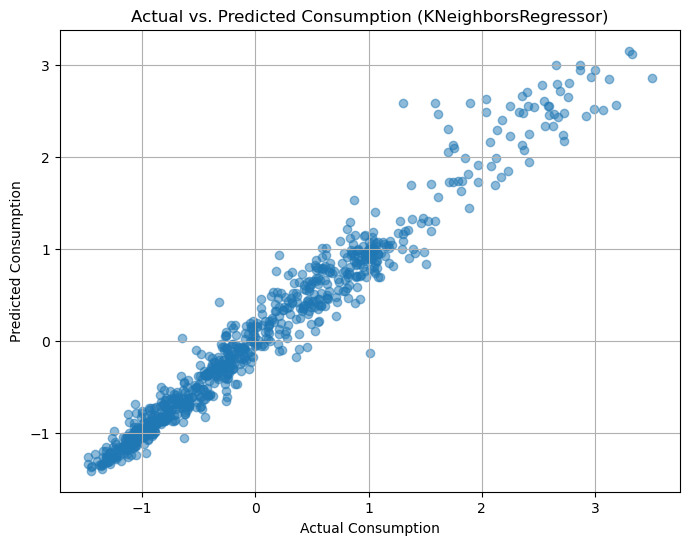

In [61]:

# Create a scatterplot to visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Consumption")
plt.ylabel("Predicted Consumption")
plt.title("Actual vs. Predicted Consumption (KNeighborsRegressor)")
plt.grid(True)
plt.show()

# Regression Algorithm Performance Comparison

Here is a comparison table of the performance of various regression algorithms based on the Mean Squared Error (MSE) and \( R^2 \)  metrics.

| Regression Algorithm                    | MSE (Mean Squared Error) | \( R^2 \) Score                          |
|-----------------------------------------|--------------------------|------------------------------------------|
| Histogram-based Gradient Boosting       | [0.0263535371837449]     | [0.9753206546920193]                     |
| Support Vector Regression (SVR)         | [0.3247215560503265]     | [0.6959074087536965]                     |
| K-Neighbors Regressor                   | [0.040313647807803964]   | [0.9622474042882265]                     |
| Decision Tree Regressor                 | [0.03806926801898515]    | [0.9643492027460319]                     |
| Random Forest Regressor                 | [0.014027360194652009]   | [0.986863772267475]                      |
| Linear Regression                       | [0.2948698310122171]     | [0.7238627084585425]                     |

In [46]:
import numpy as np
import pandas as pd
df = pd.read_csv(r'C:\Users\Philosophie\Downloads\eco2mix-regional-cons-def (1).csv', sep = ';')

# Display the first few rows of the dataframe

df.head()

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
0,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53,Bretagne,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,Île-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Hauts-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Extract only the "Date" and "Consommation (MW)" columns
df_timeseries = df[["Date", "Consommation (MW)"]]

# Display the first few rows of the new dataframe
df_timeseries.head()

,Date,Consommation (MW)
0,2013-01-01,NaN
1,2013-01-01,NaN
2,2013-01-01,NaN
3,2013-01-01,NaN
4,2013-01-01,NaN


In [48]:
# Fill the missing values in "Consommation (MW)" with its mean
mean_consumption = df_timeseries["Consommation (MW)"].mean()
df_timeseries_filled = df_timeseries.copy()
df_timeseries_filled["Consommation (MW)"] = df_timeseries_filled["Consommation (MW)"].fillna(mean_consumption)

# Check if there are any missing values left
missing_values_after_fill = df_timeseries_filled["Consommation (MW)"].isna().sum()
missing_values_after_fill

0

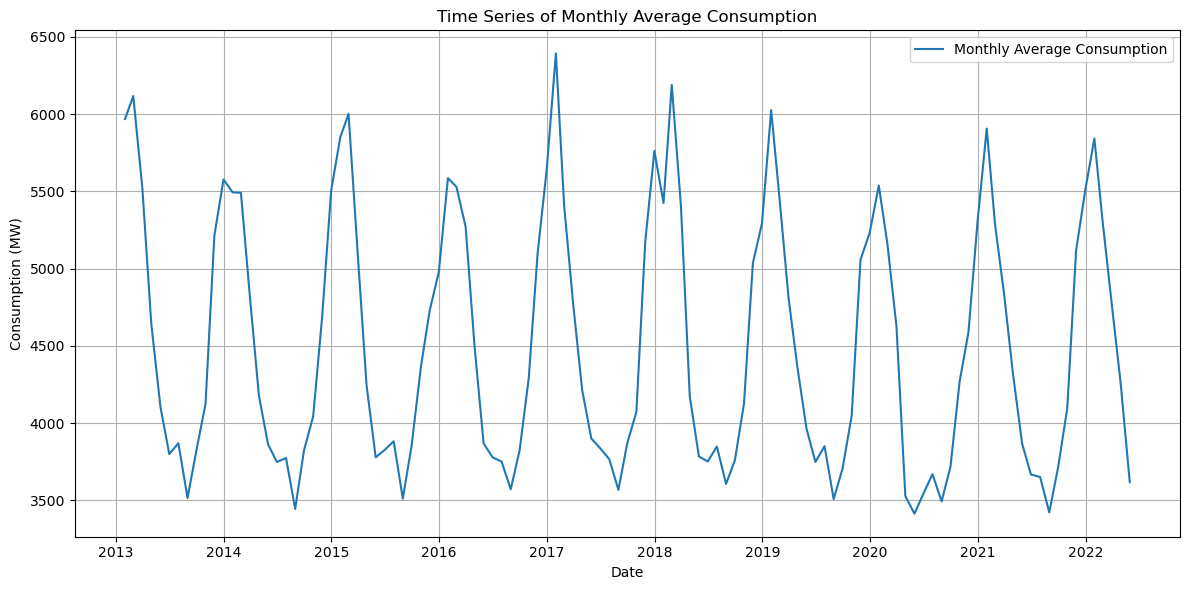

In [49]:
import matplotlib.pyplot as plt
# Attempt to load the dataset in chunks to optimize memory usage
chunk_iter = pd.read_csv(r"C:\Users\Philosophie\Downloads\eco2mix-regional-cons-def (1).csv", header=0, sep=";", chunksize=50000)

# Initialize an empty list to store each processed chunk
df_chunks = []

# Process each chunk
for chunk in chunk_iter:
    # Retain only the "Date" and "Consommation (MW)" columns
    chunk = chunk[["Date", 'Consommation (MW)']]
    
    # Convert the "Date" column to a datetime format
    chunk['Date'] = pd.to_datetime(chunk['Date'])
    
    # Fill missing values with the mean
    chunk['Consommation (MW)'] = chunk['Consommation (MW)'].fillna(mean_consumption)
    
    # Append the processed chunk to the list
    df_chunks.append(chunk)

# Concatenate all the processed chunks
df_time_series = pd.concat(df_chunks)

# Set the "Date" column as the index
df_time_series = df_time_series.set_index("Date")

# Resample the data by month and compute the mean for each month
df_time_series = df_time_series.resample('M').mean()

# Rename the "Consommation (MW)" column to "Consumption"
df_time_series.columns = ["Consumption"]

# Convert the dataframe to a series
df_time_series = df_time_series.squeeze()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df_time_series, label="Monthly Average Consumption")
plt.title("Time Series of Monthly Average Consumption")
plt.xlabel("Date")
plt.ylabel("Consumption (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

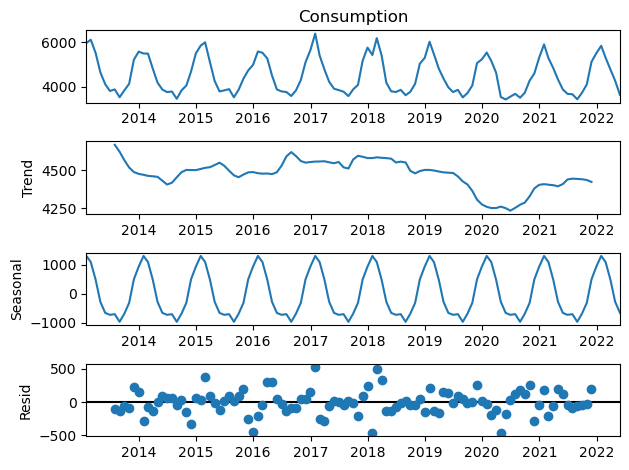

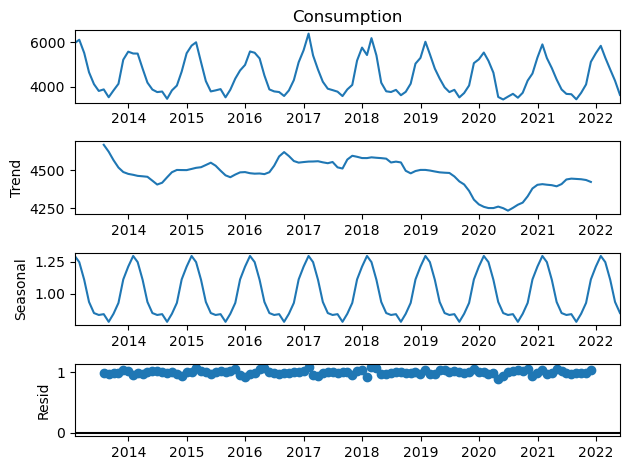

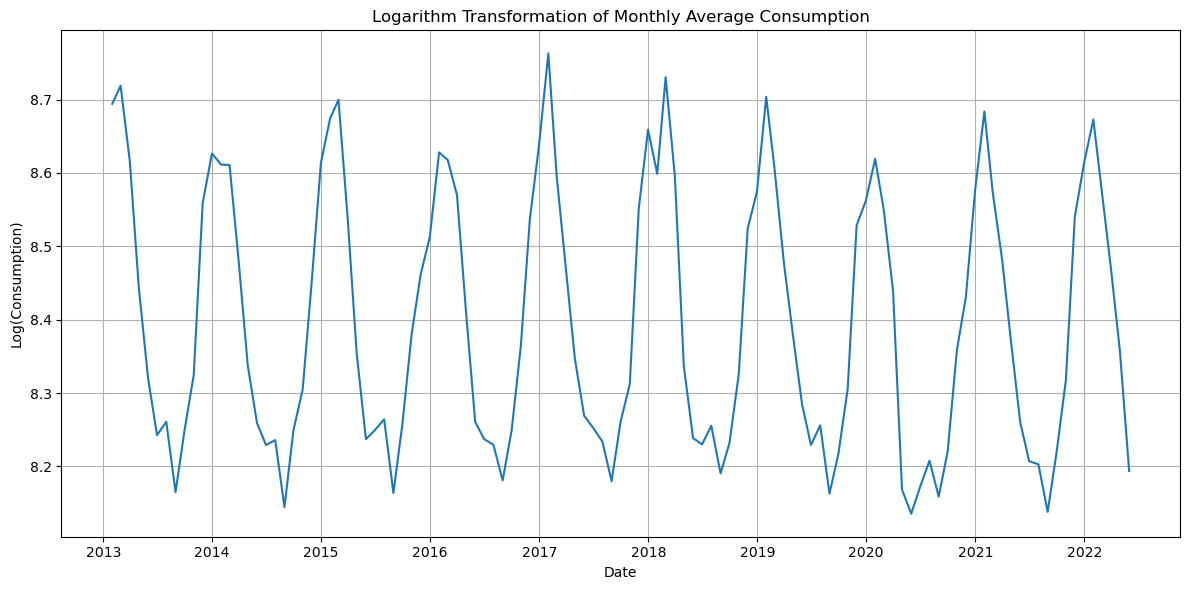

In [50]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition using the additive model
res_additive = seasonal_decompose(df_time_series)
fig_additive = res_additive.plot()

# Seasonal decomposition using the multiplicative model
res_multiplicative = seasonal_decompose(df_time_series, model='multiplicative')
fig_multiplicative = res_multiplicative.plot()

# Logarithm transformation
df_log = np.log(df_time_series)

# Plot the transformed data
plt.figure(figsize=(12, 6))
plt.plot(df_log)
plt.title("Logarithm Transformation of Monthly Average Consumption")
plt.xlabel("Date")
plt.ylabel("Log(Consumption)")
plt.grid(True)
plt.tight_layout()
plt.show()

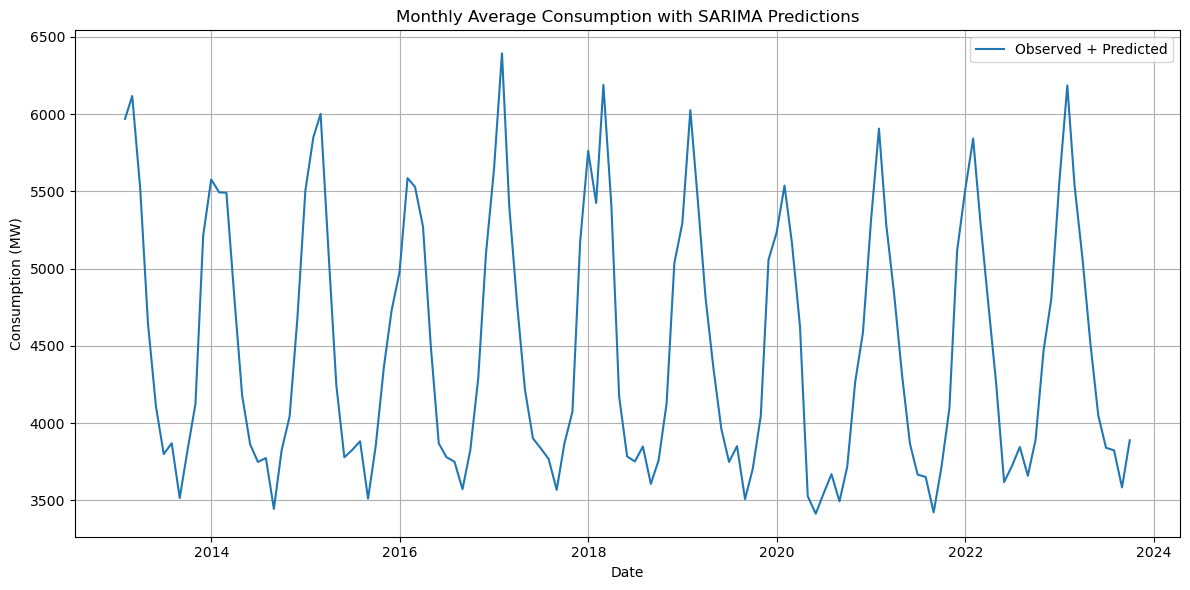

In [51]:
# Re-import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Re-process the data
df_time_series = pd.read_csv(r"C:\Users\Philosophie\Downloads\eco2mix-regional-cons-def (1).csv", header=0, sep=";")
df_time_series = df_time_series[["Date", 'Consommation (MW)']]
df_time_series['Date'] = pd.to_datetime(df_time_series['Date'])
df_time_series = df_time_series.set_index("Date")
df_time_series = df_time_series.resample('M').mean()
df_time_series.columns = ["Consumption"]
df_time_series = df_time_series.squeeze()
df_log = np.log(df_time_series)

# Define the SARIMA model with the specified parameters
model = sm.tsa.SARIMAX(df_log, order=(1, 1, 1), seasonal_order=(0, 1, 0, 24))

# Fit the model
sarima = model.fit(disp=False)

# Predict values
start_point = 113
end_point = 128
pred_log = sarima.predict(start=start_point, end=end_point)

# Convert predictions back to original scale
pred = np.exp(pred_log)

# Concatenate the original series with predictions
df_pred = pd.concat([df_time_series, pred])

# Plot the original series along with predictions
plt.figure(figsize=(12, 6))
plt.plot(df_pred, label="Observed + Predicted")
plt.title("Monthly Average Consumption with SARIMA Predictions")
plt.xlabel("Date")
plt.ylabel("Consumption (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
